In [107]:
#import the necessary libraries
import yfinance as yf
import os
from dotenv import load_dotenv
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred
from ipywidgets import interact, widgets

In [45]:
# Load .env enviroment variables
load_dotenv(r"example.env")

True

In [46]:
# API Key
fred = Fred(api_key = os.getenv("API_KEY"))

In [32]:
# Question 1: How does Bitcoin perform as a hedge during bear markets when compared to the 10 year T-Bills? 

# Answer Procedure: We are going to take the data for the monthly price changes to BTC and the 10 year T-Bills for all the major world economies selected.After taking this MoM data and compiling it, we are going to plot the data on a graph and study the trends and relationship between the prices of the 10 year T-Bills and Bitcoin, focusing on the times a bear market is in session


In [66]:
# Get data for Bitcoin and USA 10 year T-Bills 
btc = yf.Ticker("BTC-USD").history(period="max")
tbill = yf.Ticker("^TNX").history(period="max")
btc.index = pd.to_datetime(btc.index).date
tbill.index = pd.to_datetime(tbill.index).date

In [119]:
#Set to and from dates
to_date = '01-01-2023'
from_date = '01-01-1960'

# Setup descriptor ID's and get 10 year T-Bills data for all the major world economies
japan_10y = fred.get_series('IRLTLT01JPM156N',observation_start = from_date, observation_end = to_date)
usa_10y = fred.get_series('DGS10',observation_start = from_date, observation_end = to_date)
canada_10y = fred.get_series('IRLTLT01CAM156N', observation_start = from_date, observation_end = to_date)
uk_10y = fred.get_series('IRLTLT01GBM156N',observation_start = from_date, observation_end = to_date)
euro_10y= fred.get_series('IRLTLT01EZM156N',observation_start = from_date, observation_end = to_date)
india_10y = fred.get_series('INDIRLTLT01STM',observation_start = from_date, observation_end = to_date)
australia_10y = fred.get_series('IRLTLT01AUM156N',observation_start = from_date, observation_end = to_date)
germany_10y = fred.get_series('IRLTLT01DEM156N', observation_start = from_date, observation_end = to_date)
brazil_10y = fred.get_series('INTGSTBRM193N', observation_start = from_date, observation_end = to_date)
france_10y = fred.get_series('IRLTLT01FRM156N',observation_start = from_date, observation_end = to_date)
southafrica_10y = fred.get_series('IRLTLT01ZAM156N',observation_start = from_date, observation_end = to_date)
russia_10y = fred.get_series('IRLTLT01RUM156N',observation_start = from_date, observation_end = to_date)

In [141]:
china_10y = pd.read_csv(r'China 10-Year Bond Yield Historical Data.csv')
egypt_10y = pd.read_csv(r'China 10-Year Bond Yield Historical Data.csv')
nigeria_10y = pd.read_csv(r'Nigeria 10-Year Bond Yield Historical Data.csv')

In [78]:
# Create dataframe with both datasets
data = pd.concat([btc["Close"], tbill["Close"]], axis=1)
data.columns = ["Bitcoin", "10 Year T-Bills"]
data = data.dropna(how='any')
data

,Bitcoin,10 Year T-Bills
2014-09-17,457.334015,2.600
2014-09-18,424.440002,2.629
2014-09-19,394.795990,2.587
2014-09-22,402.152008,2.566
2014-09-23,435.790985,2.535
...,...,...
2023-01-12,18869.587891,3.449
2023-01-13,19909.574219,3.511
2023-01-17,21161.519531,3.535
2023-01-18,20688.781250,3.375


In [144]:
# Calculate returns for both datasets
data["Bitcoin Returns"] = data["Bitcoin"].pct_change()
data["T-Bill Returns"] = data["10 Year T-Bills"].pct_change()
data["Bitcoin Returns"]

2014-09-17         NaN
2014-09-18   -0.071926
2014-09-19   -0.069843
2014-09-22    0.018632
2014-09-23    0.083647
                ...   
2023-01-12    0.052116
2023-01-13    0.055114
2023-01-17    0.062882
2023-01-18   -0.022340
2023-01-19    0.019238
Name: Bitcoin Returns, Length: 2098, dtype: float64

In [145]:
# Find bear market periods for S&P 500 index
sp500 = yf.Ticker("^GSPC").history(period="max")
sp500.index = pd.to_datetime(sp500.index).date
sp500_returns = sp500["Close"].pct_change()
bear_markets = sp500_returns[sp500_returns < 0]
bear_markets

1928-01-04   -0.002252
1928-01-05   -0.009594
1928-01-09   -0.009060
1928-01-10   -0.007429
1928-01-11   -0.001151
                ...   
2023-01-05   -0.011646
2023-01-09   -0.000768
2023-01-17   -0.002030
2023-01-18   -0.015563
2023-01-19   -0.007638
Name: Close, Length: 11071, dtype: float64

In [146]:
# Find corresponding returns for Bitcoin and T-Bills during bear market periods
btc_bear_returns = data["Bitcoin Returns"].loc[data.index.isin(bear_markets.index)]
tbill_bear_returns = data["T-Bill Returns"].loc[data.index.isin(bear_markets.index)]

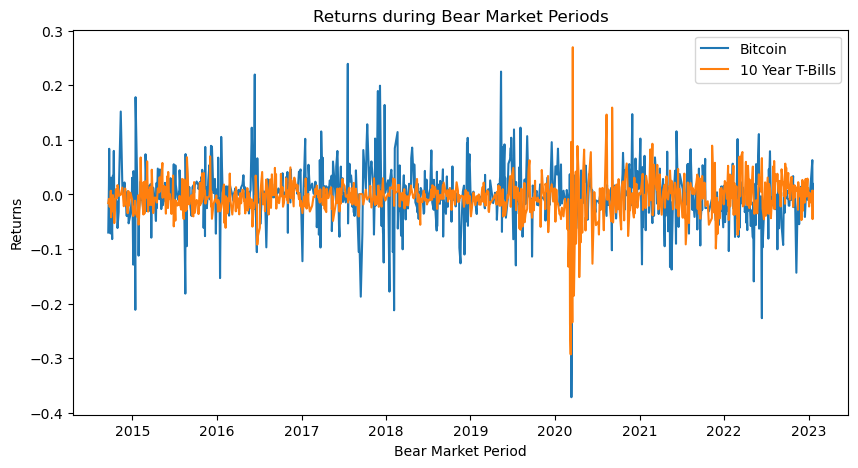

In [147]:
# Plot returns during bear market periods
plt.figure(figsize=(10,5))
plt.plot(btc_bear_returns, label="Bitcoin")
plt.plot(tbill_bear_returns, label="10 Year T-Bills")
plt.legend()
plt.xlabel("Bear Market Period")
plt.ylabel("Returns")
plt.title("Returns during Bear Market Periods")
plt.show()


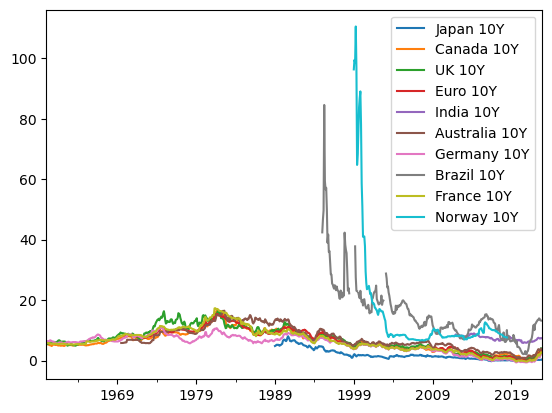

In [148]:
japan_10y.plot(label="Japan 10Y")
canada_10y.plot(label="Canada 10Y")
uk_10y.plot(label="UK 10Y")
euro_10y.plot(label="Euro 10Y")
india_10y.plot(label="India 10Y")
australia_10y.plot(label="Australia 10Y")
germany_10y.plot(label="Germany 10Y")
brazil_10y.plot(label="Brazil 10Y")
france_10y.plot(label="France 10Y")
norway_10y.plot(label="Norway 10Y")
plt.legend()
plt.show()

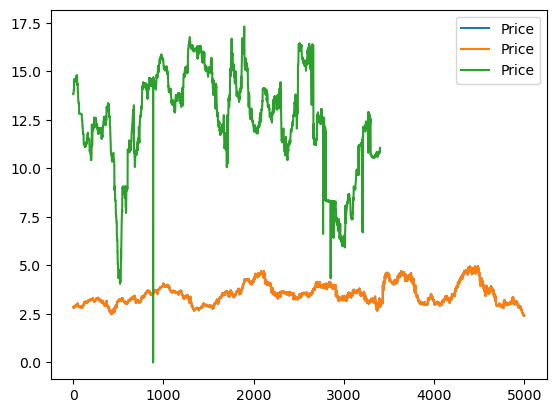

In [151]:
cen_data = pd.concat([china_10y["Price"], egypt_10y["Price"], nigeria_10y["Price"]], axis= 1 )
cen_data.plot(label="China,Egypt & Nigeria 10Y")
plt.legend()
plt.show()

,Price,Price,Price
0,2.843,2.843,13.819
1,2.863,2.863,13.818
2,2.858,2.858,13.817
3,2.856,2.856,13.821
4,2.860,2.860,14.024
...,...,...,...
4994,2.430,2.430,NaN
4995,2.432,2.432,NaN
4996,2.435,2.435,NaN
4997,2.418,2.418,NaN


In [111]:
# Create a list of assets
Countries = ["Japan_10y", "canada_10y", "uk_10y", "euro_10y"]

In [113]:
# Define a function that plots the closing prices for the selected asset
def plot_prices(Countries):
    if Countries == "japan_10y":
        japan_10y.plot()
    elif Countries == "canada_10y":
        canada_10y.plot()
    elif Countries == "UK_10y":
        uk_10y.plot()
    elif Countries == "euro_10y":
        euro_10y.plot()
    plt.legend([Countries])
    plt.show()
interact(plot_prices, Countries=widgets.Dropdown(options=Countries))

interactive(children=(Dropdown(description='Countries', options=('Japan_10y', 'canada_10y', 'uk_10y', 'euro_10…

<function __main__.plot_prices(Countries)>